In [1]:
# Data manipulation
import pandas as pd
import numpy as np

from collections import Counter

# Data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%pylab inline

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv('data/training.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head(2)

,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,1517334694,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,1517270483,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8


In [4]:
## Convert date to date_time
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'],unit ='s')
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'],unit ='s')

In [5]:
df_train.head(2)

,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,2018-01-30 17:51:34,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,2018-01-30 00:01:23,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8


In [6]:
df_train.describe()

,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,website_id,ua_browser_version,user_average_seconds_played,seconds_played
count,3.000000e+06,3.000000e+06,3.000000e+06,2.958556e+06,3.000000e+06,3.000000e+06,2.399960e+06,1.099705e+06,3.000000e+06
mean,2.910934e+01,1.990696e+05,2.119606e+05,4.665226e+03,5.790617e+04,3.218541e+04,3.662273e+01,1.004955e+01,6.967639e+00
std,2.109566e+01,7.107768e+03,7.470406e+03,2.919001e+03,1.791304e+04,1.003381e+04,2.644128e+01,9.053615e+00,9.054720e+00
min,5.000000e+00,1.213690e+05,1.243910e+05,6.250000e+02,1.874900e+04,1.432100e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,1.988620e+05,2.113480e+05,1.768000e+03,4.495100e+04,2.346300e+04,1.100000e+01,3.375000e+00,1.000000e+00
50%,2.800000e+01,2.012290e+05,2.137830e+05,3.774000e+03,6.194800e+04,3.247900e+04,4.100000e+01,8.500000e+00,4.000000e+00
75%,3.000000e+01,2.018620e+05,2.146310e+05,7.452000e+03,7.240800e+04,4.121400e+04,6.300000e+01,1.466667e+01,1.100000e+01
max,1.350000e+02,2.029200e+05,2.158850e+05,9.322000e+03,8.765900e+04,5.159200e+04,4.127000e+03,2.250000e+02,1.350000e+02


In [7]:
print('Training set length: ', len(df_train))
df_train.columns

Training set length:  3000000


Index(['auction_id', 'timestamp', 'creative_duration', 'creative_id',
       'campaign_id', 'advertiser_id', 'placement_id', 'placement_language',
       'website_id', 'referer_deep_three', 'ua_country', 'ua_os', 'ua_browser',
       'ua_browser_version', 'ua_device', 'user_average_seconds_played',
       'seconds_played'],
      dtype='object')

In [8]:
print('Test set length: ', len(df_test))
df_test.columns

Test set length:  1000000


Index(['auction_id', 'timestamp', 'creative_duration', 'creative_id',
       'campaign_id', 'advertiser_id', 'placement_id', 'placement_language',
       'website_id', 'referer_deep_three', 'ua_country', 'ua_os', 'ua_browser',
       'ua_browser_version', 'ua_device', 'user_average_seconds_played'],
      dtype='object')

In [20]:
df_train["placement_language"].unique()

array(['fr', 'de', 'en', 'es', 'pt', 'it', 'nan'], dtype=object)

In [9]:
df_train["placement_language"]=df_train["placement_language"].map(lambda x: str(x))

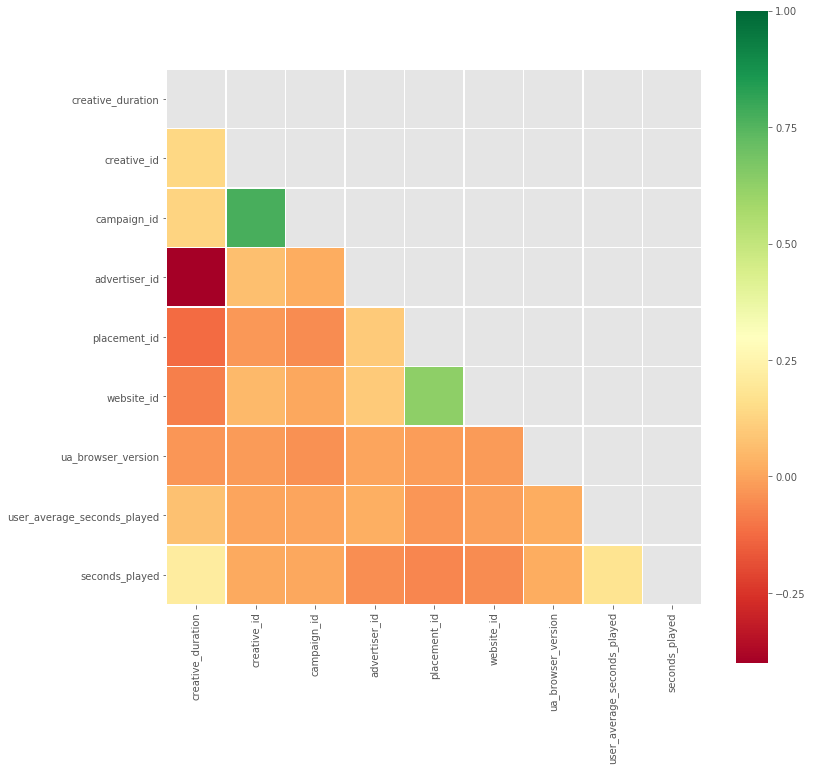

In [10]:
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap="RdYlGn",
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": 1}, ax=ax);

In [11]:
from collections import Counter

for col in df_train.columns:
    if pd.isnull(df_train[col]).values.any():
        print('NaNs in', col, df_train[col].dtypes)
        d = dict(Counter(pd.isnull(df_train[col])))
        nans = ( d[True] / (d[True] + d[False]) ) * 100
        print('Proportion of NaNs: %f %%' % ( nans))
        print('-----------------------------')

NaNs in advertiser_id float64
Proportion of NaNs: 1.381467 %
-----------------------------
NaNs in referer_deep_three object
Proportion of NaNs: 1.223233 %
-----------------------------
NaNs in ua_country object
Proportion of NaNs: 0.000467 %
-----------------------------
NaNs in ua_browser_version float64
Proportion of NaNs: 20.001333 %
-----------------------------
NaNs in ua_device object
Proportion of NaNs: 0.006600 %
-----------------------------
NaNs in user_average_seconds_played float64
Proportion of NaNs: 63.343167 %
-----------------------------


In [12]:
print('Number of entries when NaNs are kept: ',len(df_train))
print('Number of entries when all NaNs are dropped: ' ,len(df_train.dropna()))

Number of entries when NaNs are kept:  3000000
Number of entries when all NaNs are dropped:  926617


In [30]:
# Premier jet, tout remplacer par 0 
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [14]:
# Replace the date format, expand into 3 columns year, month, day

df_train['Year'] = df_train['timestamp'].map(lambda x: x.year)
df_train['Month'] = df_train['timestamp'].map(lambda x: x.month)
df_train['Day'] = df_train['timestamp'].map(lambda x: x.day)
df_train['Hour'] = df_train['timestamp'].map(lambda x: x.hour)
df_train['minute'] = df_train['timestamp'].map(lambda x: x.minute)

df_test['Year'] = df_test['timestamp'].map(lambda x: x.year)
df_test['Month'] = df_test['timestamp'].map(lambda x: x.month)
df_test['Day'] = df_test['timestamp'].map(lambda x: x.day)
df_test['Hour'] = df_train['timestamp'].map(lambda x: x.hour)
df_test['minute'] = df_train['timestamp'].map(lambda x: x.minute)

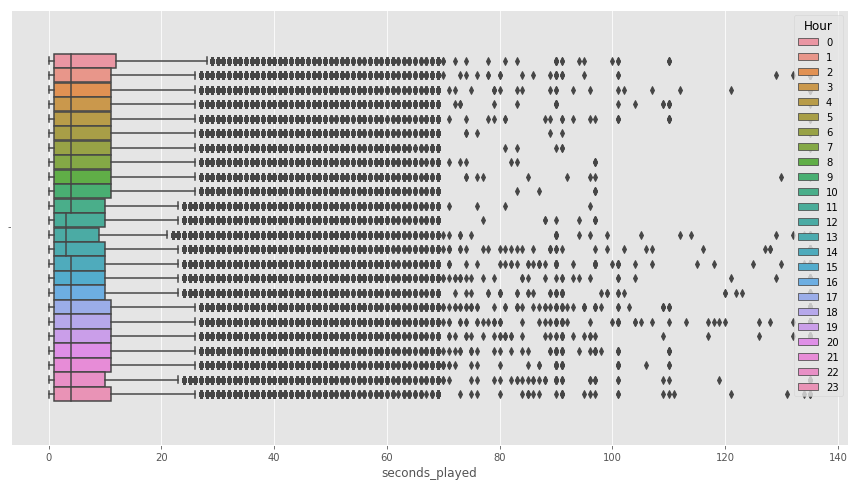

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_train['seconds_played'],  y=[""]*len(df_train), hue=df_train['Hour']);

In [27]:
from sklearn.preprocessing import LabelEncoder
from time import time

def encode_categorical(df):
    
    # Create new dataframe which will contain only numerical features
    df_encoded = pd.DataFrame()
    
    
    for col in df.columns:
        
        # Encode all categorical features with LabelEncoder
        if df[col].dtypes == dtype('object'):
            print('Encoding '+str(col))
            le = LabelEncoder()
            t0 = time()
            df[col]=df_train[col].map(lambda x: str(x))
            l = df_train[col].unique()
            print(l)
            print(len(l))
            le.fit(np.unique(df[col].values))
            df_encoded[col] = df[col].map(lambda x: le.transform([x])[0])
            print('%s encoded (%f s)' %(col, time()-t0))
            
        # Keep the remaining numerical features as they are (to be treated afterwards)
        else:
            df_encoded[col] = df[col]
    return df_encoded

In [29]:
df_train_encoded = df_train.drop(["auction_id","referer_deep_three"],axis=1)
df_train_encoded = encode_categorical(df_train_encoded)
df_train_encoded.head()

Encoding placement_language
7
placement_language encoded (111.950228 s)
Encoding ua_country
130
ua_country encoded (234.598378 s)
Encoding ua_os
20
ua_os encoded (118.112451 s)
Encoding ua_browser
96
ua_browser encoded (193.625291 s)
Encoding ua_device
5
ua_device encoded (107.387685 s)


,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played,Year,Month,Day,Hour,minute
0,2018-01-30 17:51:34,25,198280,210671,7109.0,47216,3,31838,21,16,50,16.0,2,0.000000,9,2018,1,30,17,51
1,2018-01-30 00:01:23,29,195285,210074,2270.0,77249,3,46416,122,16,17,64.0,2,0.000000,8,2018,1,30,0,1
2,2018-01-30 19:18:19,60,201430,214063,2643.0,25817,3,20824,122,17,28,0.0,4,0.000000,1,2018,1,30,19,18
3,2018-01-30 21:09:02,29,198262,215400,2244.0,86526,3,39091,123,16,17,63.0,2,18.166666,1,2018,1,30,21,9
4,2018-01-30 11:15:26,29,174590,184750,3617.0,85350,3,14796,122,16,29,58.0,2,0.000000,0,2018,1,30,11,15


In [31]:
df_test_encoded = df_test.drop(["auction_id","referer_deep_three"],axis=1)
df_test_encoded = encode_categorical(df_test_encoded)
df_test_encoded.head()

Encoding placement_language
7
placement_language encoded (37.551715 s)
Encoding ua_country
130
ua_country encoded (70.299921 s)
Encoding ua_os
20
ua_os encoded (40.708952 s)
Encoding ua_browser
96
ua_browser encoded (65.052663 s)
Encoding ua_device
5
ua_device encoded (35.701914 s)


,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,Year,Month,Day,Hour,minute
0,2018-01-31 12:54:50,29,201701,214397,5500.0,66536,3,39541,19,13,44,64.0,2,22.0,2018,1,31,17,51
1,2018-01-31 16:56:35,21,199890,212176,1413.0,30466,3,23288,98,13,15,10.0,2,0.0,2018,1,31,0,1
2,2018-01-31 19:15:42,29,202354,215274,9307.0,59626,3,37824,98,14,23,63.0,4,15.0,2018,1,31,19,18
3,2018-01-31 14:33:36,69,201862,214627,1328.0,67283,3,41761,99,13,15,0.0,2,0.0,2018,1,31,21,9
4,2018-01-31 21:53:27,14,198848,211331,2168.0,46479,3,31511,98,13,24,64.0,2,5.0,2018,1,31,11,15


In [40]:
def RMSPE(y_true, y_pred):
    yt = np.array(y_true, dtype=float64)
    yp = np.array(y_pred, dtype=float64)
    r = [ ((yt[i] - yp[i]))**2 for i in range(len(yp))]
    return np.sqrt( np.sum(r)/len(r))

In [45]:
from sklearn.model_selection import TimeSeriesSplit
def time_series_cross_val(X, y, reg):
    """
    Perform a cross validation over data X and labels y using a given regressor reg
    Input : data X, labels y, regressor reg 
    Output: scores over each fold and mean cross validation score 
    """
    i=0
    rmspe_scores = []
    tscv = TimeSeriesSplit(n_splits=5)
    split_time_series = tscv.split(X)
            
    for train_index, test_index in split_time_series:
            i+=1
            print("Fold %d -------------------------------" %(i))
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            print("X_train time extremes: ", str(X_train[:,0].min()), str(X_train[:,0].max()))
            print("X_test time extremes: ", str(X_test[:,0].min()), str(X_test[:,0].max()))
            
            #Deal with dates as features later\n",
            X_train = X_train[:,1:]
            X_test = X_test[:,1:]
            
            
            print('Training regressor...')
            reg.fit(X_train, y_train)
            y_pred = reg.predict(X_test)

            rmspe = RMSPE(y_test, y_pred)
            rmspe_scores += [rmspe]
            print('RMSPE on the predictions: ', rmspe)
    
    print("-------------------------------")
    mean_cross_val_score = np.mean(rmspe_scores)
    print('mean cross validation score:', mean_cross_val_score)
    pass

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#data for the regressors 
df_sorted = df_train_encoded.sort_values('timestamp').reset_index().drop('index', axis=1)
X = df_sorted.drop(['seconds_played'], axis=1).values
y = df_sorted['seconds_played'].values


In [46]:
lin_reg = LinearRegression()
time_series_cross_val(X, y, lin_reg)

Fold 1 -------------------------------
X_train time extremes:  2018-01-30 00:00:00 2018-01-30 05:16:44
X_test time extremes:  2018-01-30 05:16:45 2018-01-30 11:00:06
Training regressor...
RMSPE on the predictions:  9.372115163636968
Fold 2 -------------------------------
X_train time extremes:  2018-01-30 00:00:00 2018-01-30 11:00:06
X_test time extremes:  2018-01-30 11:00:06 2018-01-30 14:24:32
Training regressor...
RMSPE on the predictions:  8.495638870665845
Fold 3 -------------------------------
X_train time extremes:  2018-01-30 00:00:00 2018-01-30 14:24:32
X_test time extremes:  2018-01-30 14:24:32 2018-01-30 17:32:42
Training regressor...
RMSPE on the predictions:  8.568468169944877
Fold 4 -------------------------------
X_train time extremes:  2018-01-30 00:00:00 2018-01-30 17:32:42
X_test time extremes:  2018-01-30 17:32:42 2018-01-30 20:26:37
Training regressor...
RMSPE on the predictions:  8.514322887616903
Fold 5 -------------------------------
X_train time extremes:  2018-

In [ ]:
# Sort by ascending data in order to get coherent time period splits
reg = RandomForestRegressor()
time_series_cross_val(X, y, reg)

Fold 1 -------------------------------
X_train time extremes:  2018-01-30 00:00:00 2018-01-30 05:16:44
X_test time extremes:  2018-01-30 05:16:45 2018-01-30 11:00:06
Training regressor...


In [50]:
X_test = df_test_encoded.values
X_test = X_test[:,1:]
X_train = X[:,1:]
y_train = y

reg = LinearRegression()
reg.fit(X_train, y)
y_pred = reg.predict(X_test)

In [51]:
def save_prediction(y_pred, output_file = 'predictions.csv'): 
    df_pred = pd.DataFrame({'predicted_seconds_played':y_pred})
    df_id = pd.DataFrame({'auction_id':df_test['auction_id']})
    frames = [df_id, df_pred]
    result = pd.concat(frames, axis = 1)
    result.to_csv( output_file, index = False)
    result.head(5)

In [52]:
save_prediction(y_pred, output_file= 'predictions.csv')